In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dữ liệu RMSE của các mô hình với các optimizer
df = pd.read_excel('/kaggle/input/compare/IS403_ETH_Comparision.xlsx')
df['Proportion'] = df['Proportion'].astype(str)

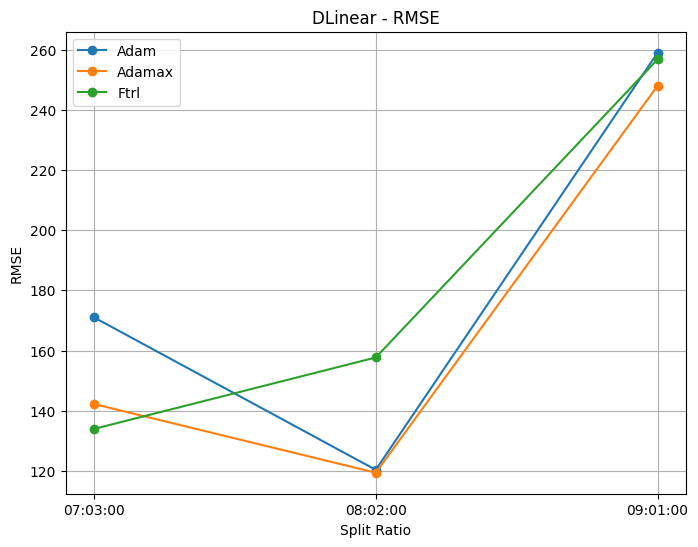

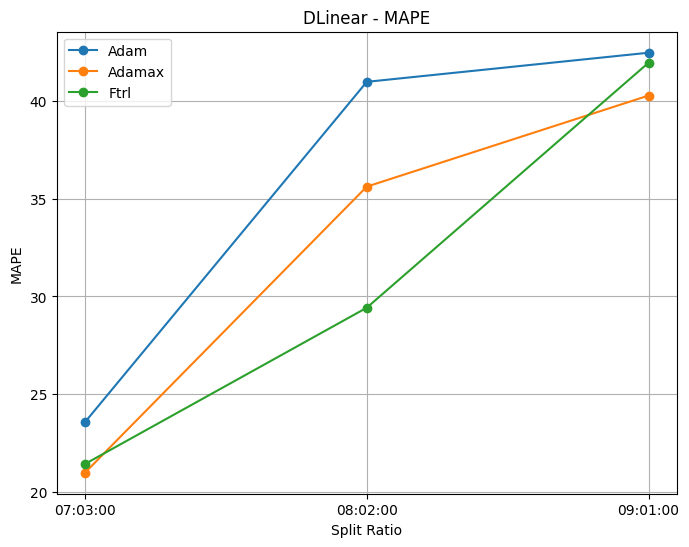

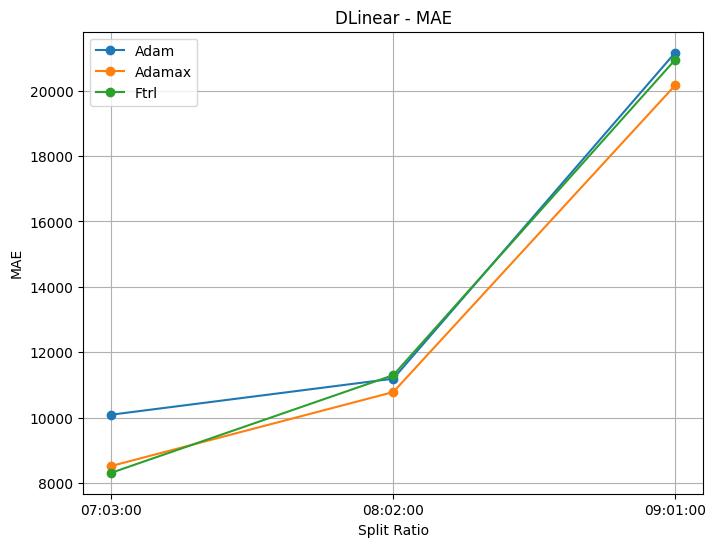

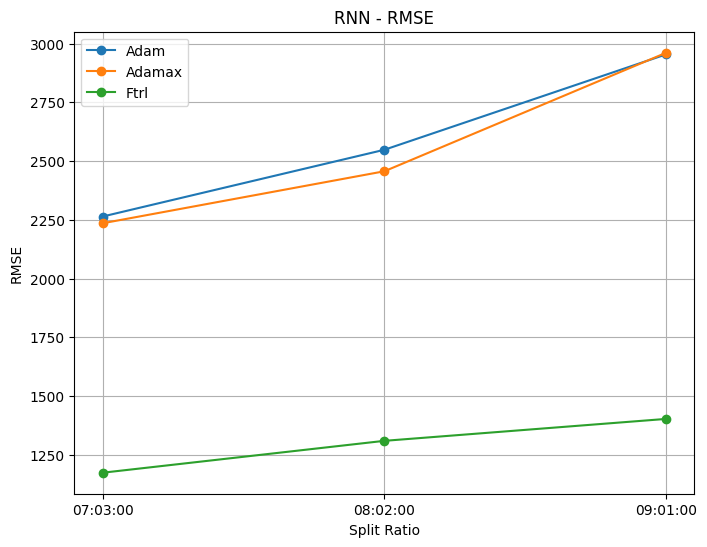

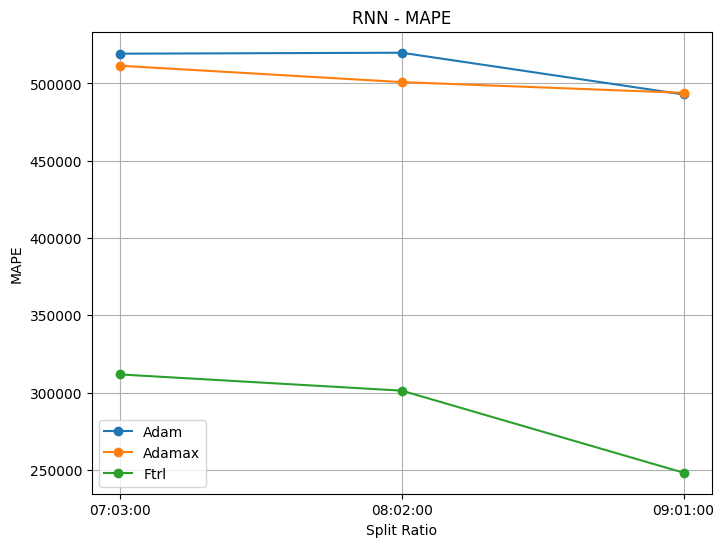

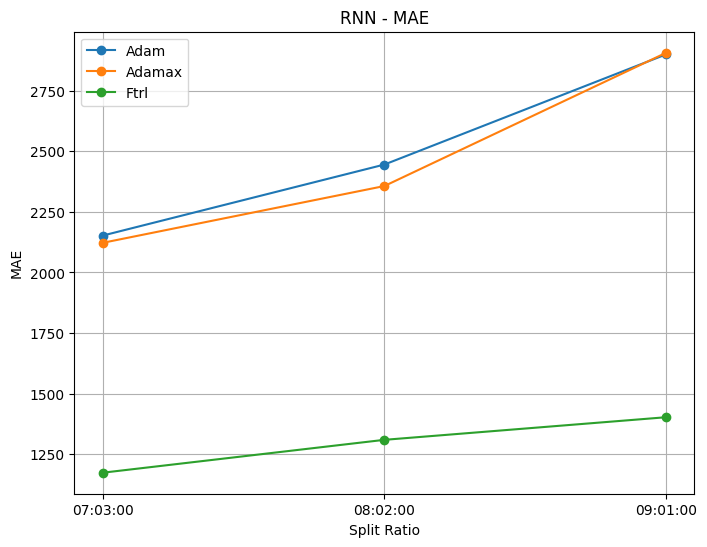

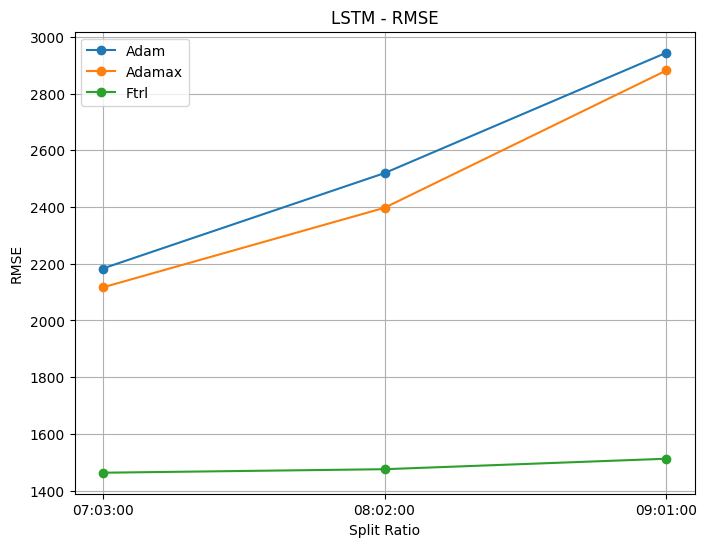

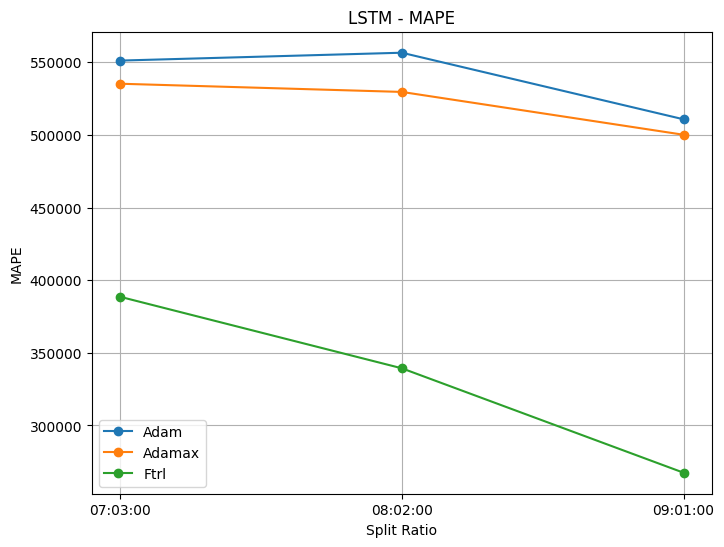

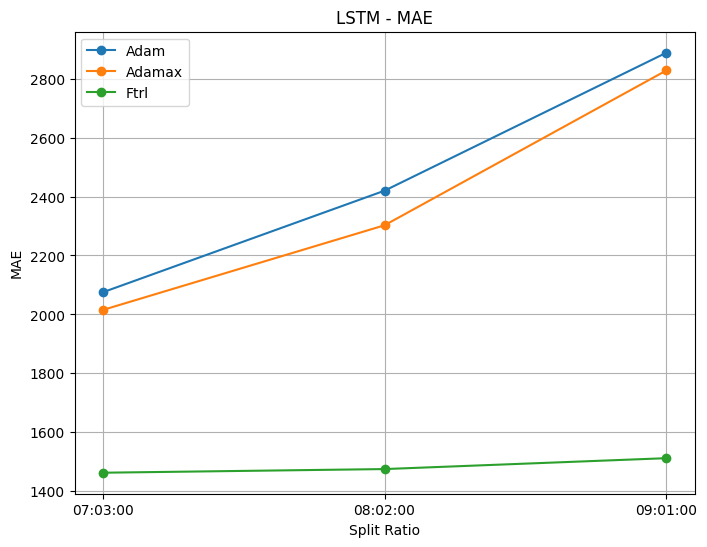

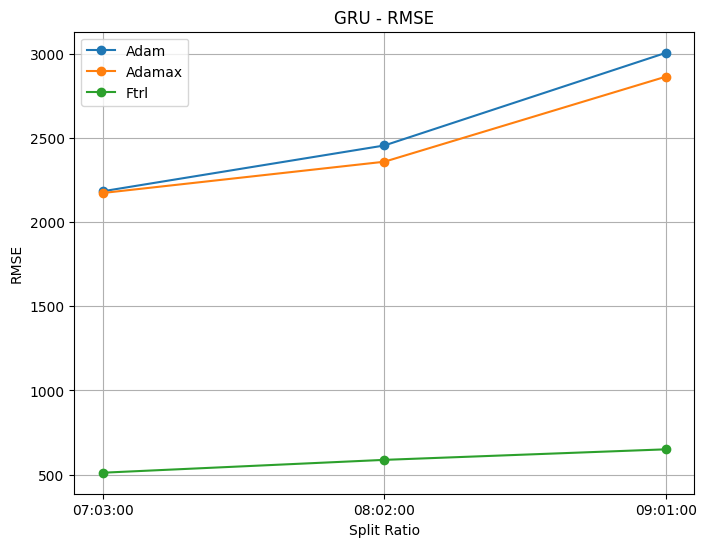

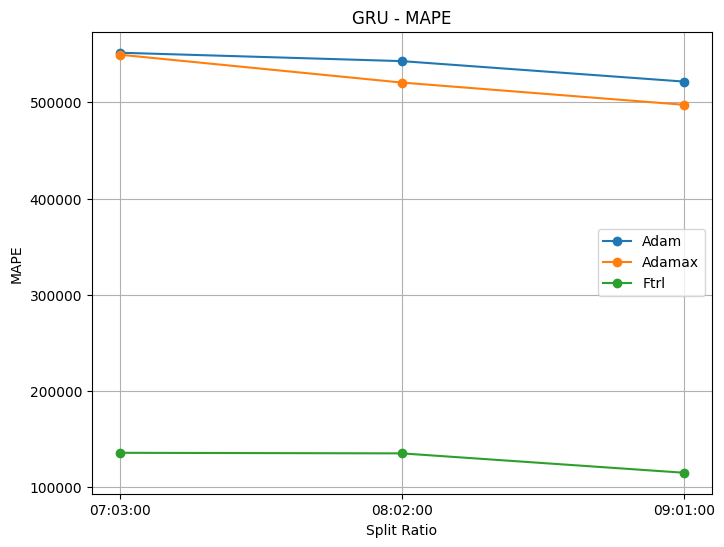

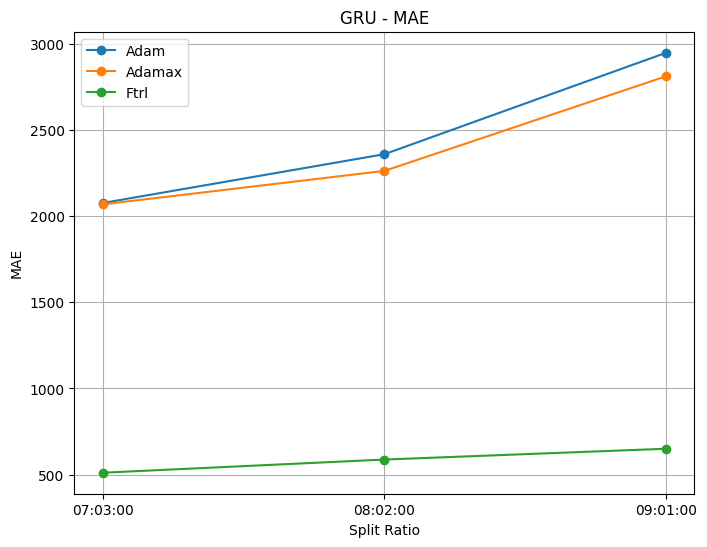

In [21]:
def plot_comparison(df, model, metric):
    plt.figure(figsize=(8, 6))
    for optimizer in df['Optimizer'].unique():
        subset = df[(df['Model'] == model) & (df['Optimizer'] == optimizer)]
        if not subset.empty:
            plt.plot(subset['Proportion'], subset[metric], label=f'{optimizer}', marker='o')
    plt.title(f'{model} - {metric}')
    plt.xlabel('Split Ratio')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting metrics for each model
models = df['Model'].unique()
metrics = ['RMSE', 'MAPE', 'MAE']

for model in models:
    for metric in metrics:
        plot_comparison(df, model, metric)

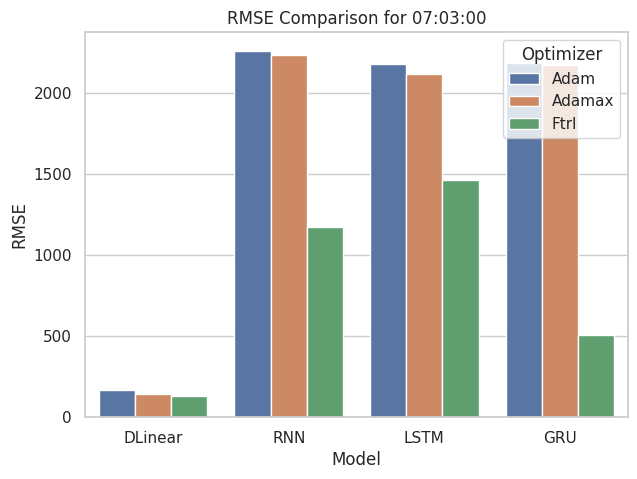

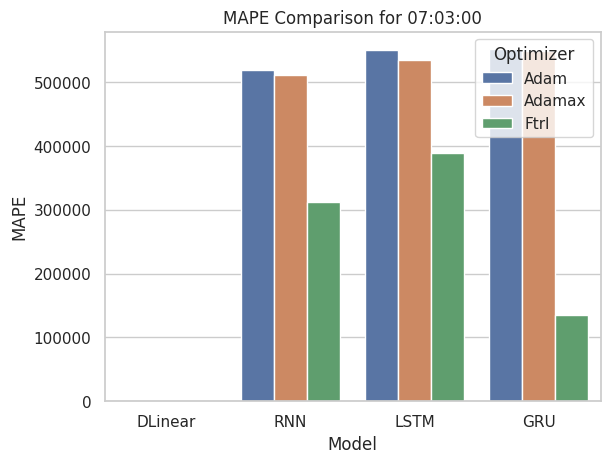

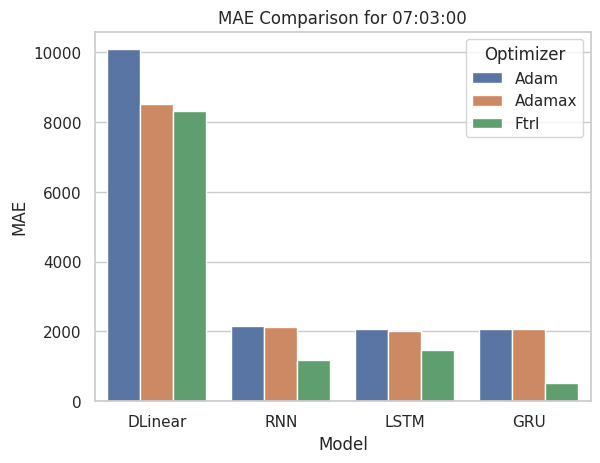

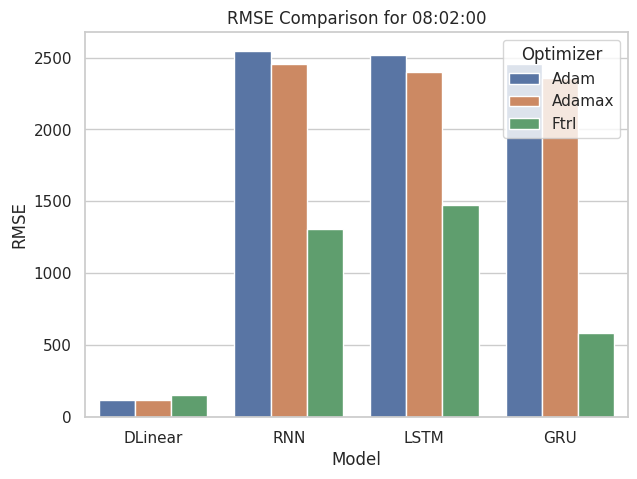

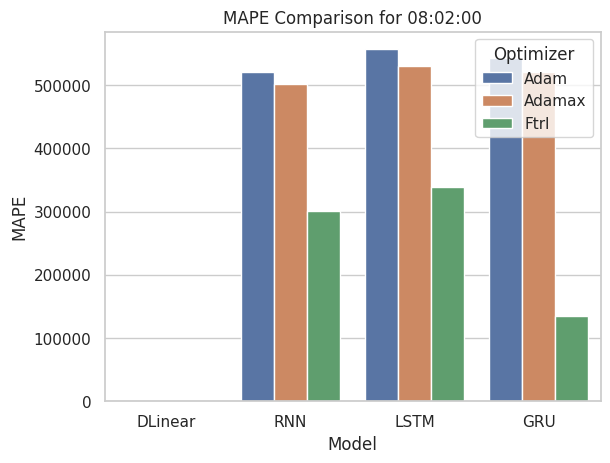

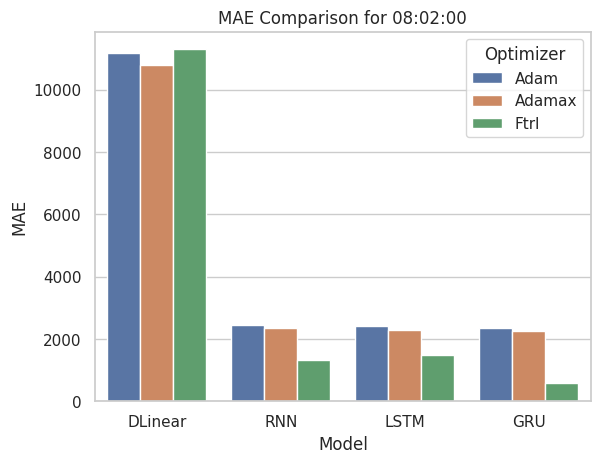

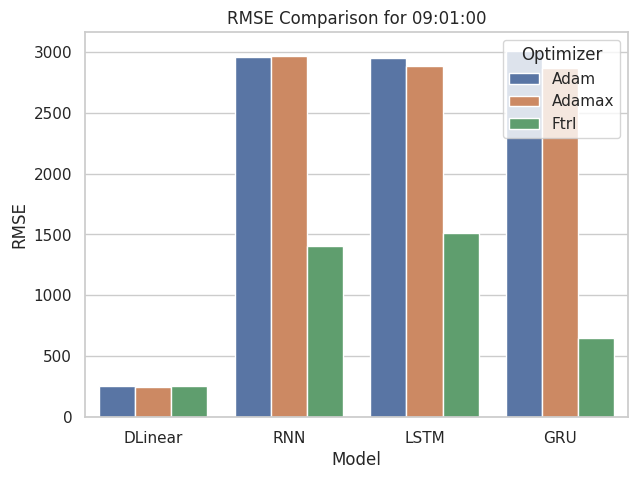

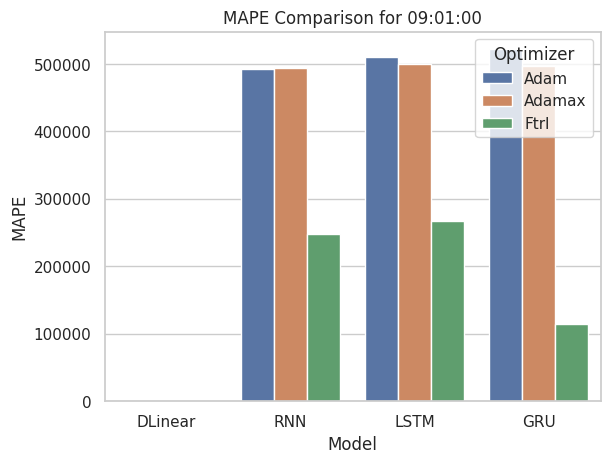

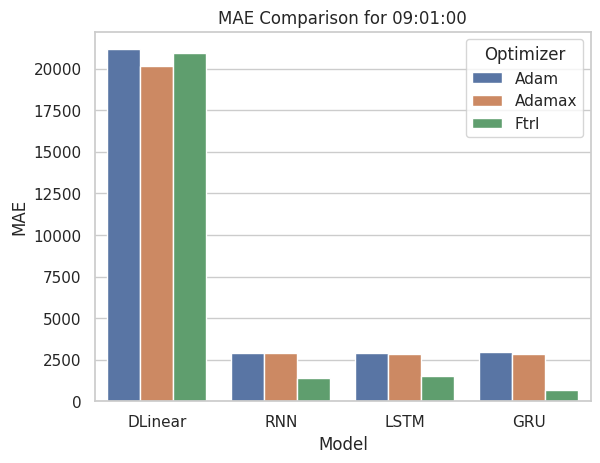

In [34]:
df = pd.DataFrame(df)

# Thiết lập Seaborn
sns.set_theme(style="whitegrid")

# Định dạng DataFrame cho vẽ biểu đồ cột ghép
metrics = ['RMSE', 'MAPE', 'MAE']
proportions = df['Proportion'].unique()

# Vẽ biểu đồ cột ghép
for proportion in proportions:
    plt.figure(figsize=(7, 5))
    for metric in metrics:
        # Lọc dữ liệu cho tỷ lệ này và vẽ biểu đồ cột ghép
        subset = df[(df['Proportion'] == proportion)]
        sns.barplot(x='Model', y=metric, hue='Optimizer', data=subset)
        plt.title(f'{metric} Comparison for {proportion}')
        plt.ylabel(metric)
        plt.xlabel('Model')
        plt.legend(title='Optimizer', loc='upper right')
        plt.show()

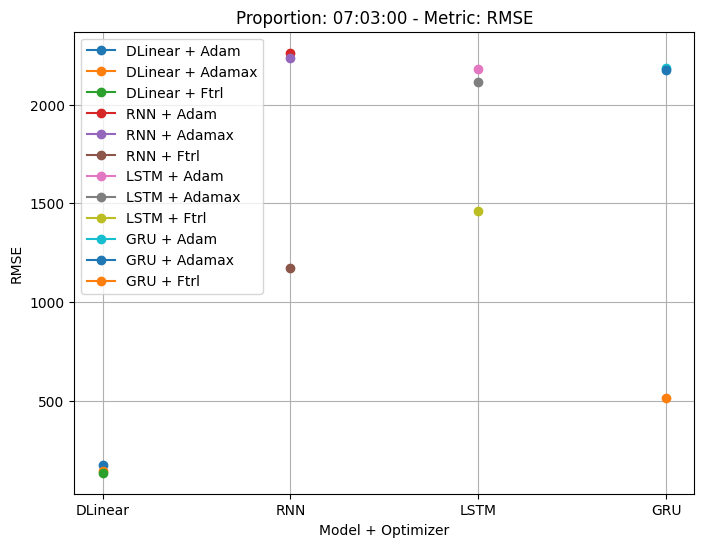

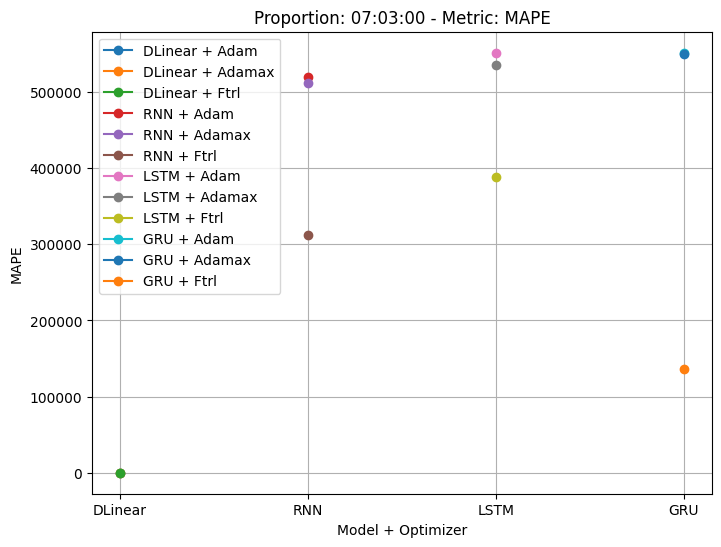

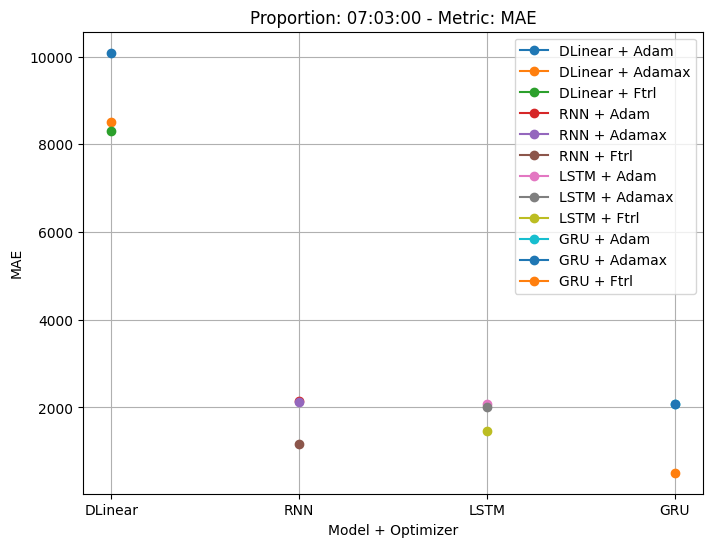

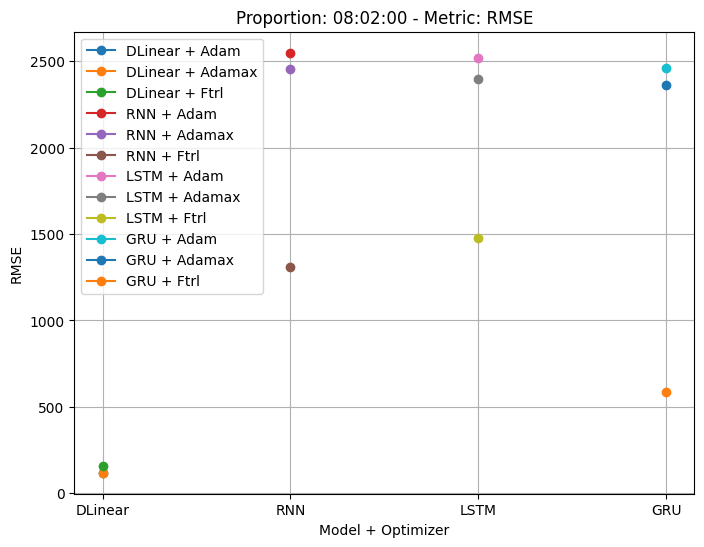

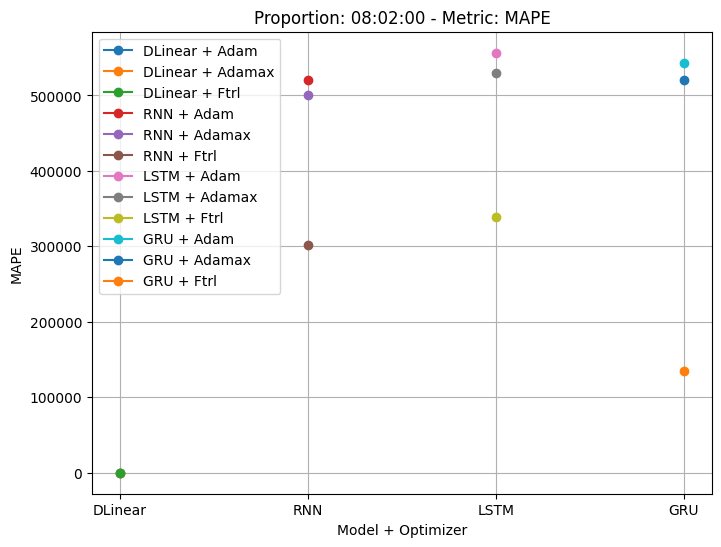

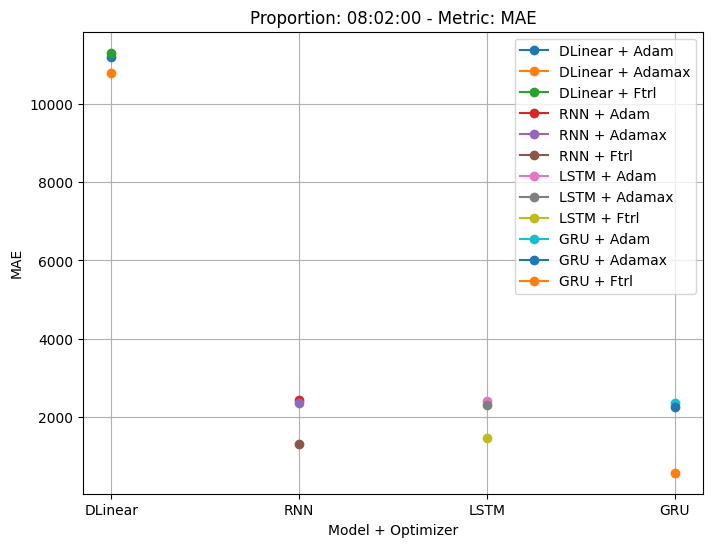

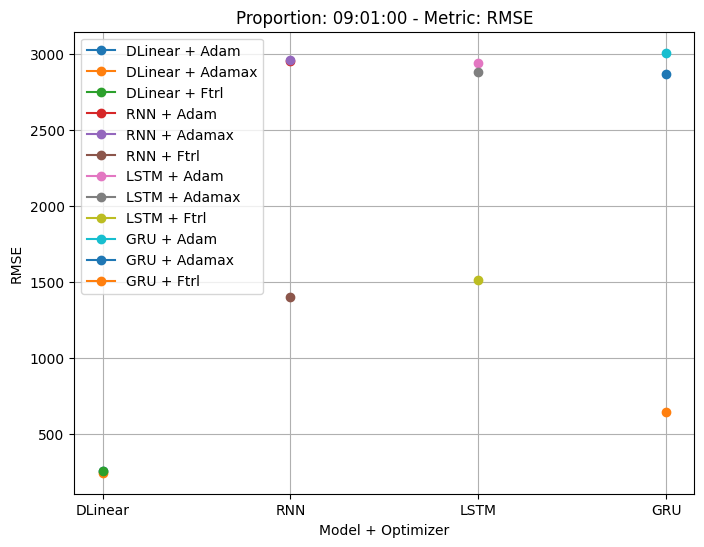

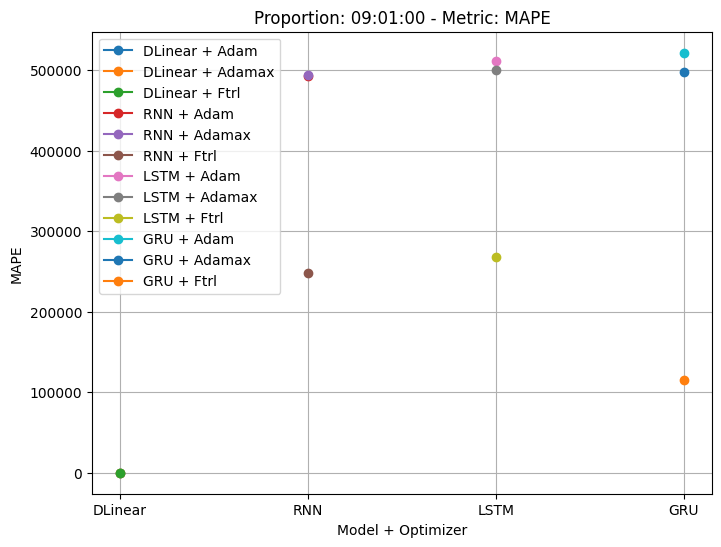

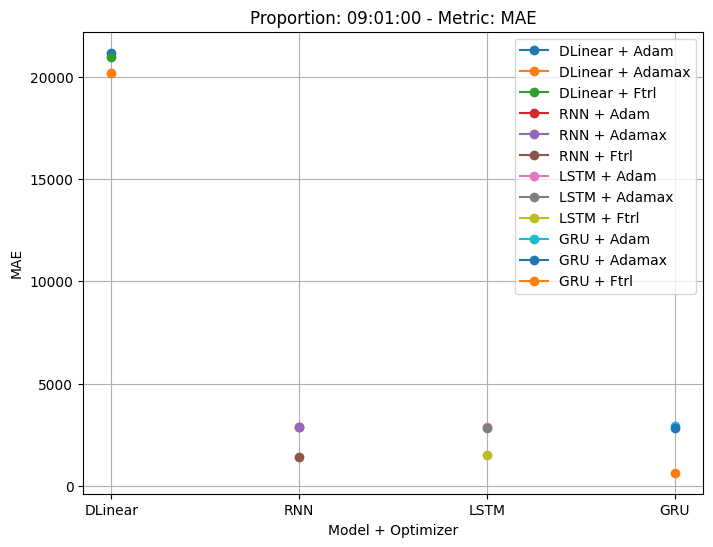

In [24]:
def plot_comparison(df, proportion, metric):
    # Select up to three unique optimizers
    unique_optimizers = df['Optimizer'].unique()[:3]
    plt.figure(figsize=(8, 6))
    for model in df['Model'].unique():
        for optimizer in unique_optimizers:
            subset = df[(df['Proportion'] == proportion) & (df['Model'] == model) & (df['Optimizer'] == optimizer)]
            if not subset.empty:
                plt.plot(model, subset[metric].values[0], marker='o', label=f'{model} + {optimizer}')
    plt.title(f'Proportion: {proportion} - Metric: {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting metrics for each proportion
proportions = df['Proportion'].unique()
metrics = ['RMSE', 'MAPE', 'MAE']

for proportion in proportions:
    for metric in metrics:
        plot_comparison(df, proportion, metric)